## Importing the required libraries for Model Development

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

#modeling

from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedGroupKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn import ensemble
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

## Loading the data from Google Drive

❗**NOTE: Before running this step, add a shortcut of the shared project folder to your drive**:
https://drive.google.com/drive/folders/1Zss_aak84cHnoGLaK6lUQLyDNKqAdn6s?usp=sharing


In [13]:
data_path = '/global/home/users/yaqiantang/discoveryData/data_monthly_v1_0.csv'
df = pd.read_csv(data_path)

In [14]:
df.head(5)

,SITE_ID,year,month,TIMESTAMP,dataset,SITE_IGBP,LOCATION_LAT,LOCATION_LONG,TA_F,VPD_F,...,Percent_Snow,Fpar,Lai,LST_Day,LST_Night,MODIS_IGBP,MODIS_PFT,koppen_sub,koppen,CO2_concentration
0,AR-SLu,2010,1,201001,FLUXNET,MF,-33.4648,-66.4598,28.493,23.378,...,0.0,0.49,1.2,313.84,293.58,OSH,SH,BSk,Arid,387.110
1,AR-SLu,2010,2,201002,FLUXNET,MF,-33.4648,-66.4598,26.673,14.369,...,0.0,0.43,0.9,309.86,292.96,OSH,SH,BSk,Arid,387.675
2,AR-SLu,2010,3,201003,FLUXNET,MF,-33.4648,-66.4598,25.744,15.167,...,0.0,0.41,0.8,309.18,290.52,OSH,SH,BSk,Arid,388.195
3,AR-SLu,2010,4,201004,FLUXNET,MF,-33.4648,-66.4598,18.450,9.185,...,0.0,0.36,0.5,303.24,286.34,OSH,SH,BSk,Arid,388.905
4,AR-SLu,2010,5,201005,FLUXNET,MF,-33.4648,-66.4598,13.493,5.823,...,0.0,0.37,0.5,296.20,277.82,OSH,SH,BSk,Arid,389.320


In [15]:
df.tail(5)

,SITE_ID,year,month,TIMESTAMP,dataset,SITE_IGBP,LOCATION_LAT,LOCATION_LONG,TA_F,VPD_F,...,Percent_Snow,Fpar,Lai,LST_Day,LST_Night,MODIS_IGBP,MODIS_PFT,koppen_sub,koppen,CO2_concentration
19010,SE-Lnn,2018,8,201808,ICOS2018,CRO,58.34063,13.10177,16.767,5.483,...,0.000000,0.28,0.5,296.66,282.84,CRO,CRO,Dfb,Cold,406.525
19011,SE-Lnn,2018,9,201809,ICOS2018,CRO,58.34063,13.10177,11.719,2.344,...,0.000000,0.43,0.7,290.18,280.78,CRO,CRO,Dfb,Cold,405.985
19012,SE-Lnn,2018,10,201810,ICOS2018,CRO,58.34063,13.10177,7.827,1.575,...,0.000000,0.54,1.0,284.16,276.10,CRO,CRO,Dfb,Cold,406.280
19013,SE-Lnn,2018,11,201811,ICOS2018,CRO,58.34063,13.10177,3.794,0.563,...,0.800000,NaN,NaN,277.06,270.88,CRO,CRO,Dfb,Cold,407.320
19014,SE-Lnn,2018,12,201812,ICOS2018,CRO,58.34063,13.10177,1.015,0.418,...,14.666666,NaN,NaN,271.54,267.06,CRO,CRO,Dfb,Cold,407.820


In [ ]:
df.describe()

,year,month,TIMESTAMP,LOCATION_LAT,LOCATION_LONG,TA_F,VPD_F,P_F,NETRAD,NEE_VUT_REF,...,NDVI,NDWI,NIRv,kNDVI,Percent_Snow,Fpar,Lai,LST_Day,LST_Night,CO2_concentration
count,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000,18662.000000,16322.000000,19015.000000,...,18563.000000,18609.000000,18563.000000,18609.000000,18872.000000,18080.000000,18080.000000,19015.000000,19015.000000,19015.000000
mean,2010.626821,6.590849,201069.272942,42.190960,-21.169896,10.335353,5.431886,2.095369,81.498813,-0.636588,...,0.535087,0.165757,0.131622,0.305653,11.620639,0.484481,1.430520,289.817007,277.196492,390.256548
std,5.150904,3.387905,515.043678,18.723591,68.771907,9.497750,5.196374,2.008792,60.609140,2.119773,...,0.200831,0.199895,0.072160,0.173797,26.684868,0.199732,1.128479,13.737654,9.700046,11.250848
min,2001.000000,1.000000,200101.000000,-37.425900,-157.408900,-31.455000,0.007000,0.000000,-67.894013,-14.029700,...,0.002544,-0.276199,0.001238,0.000016,0.000000,0.060000,0.100000,238.540000,237.900000,369.070000
25%,2006.000000,4.000000,200612.000000,39.942690,-90.079900,3.874000,1.884000,0.727000,25.832575,-1.494660,...,0.405351,0.028162,0.076971,0.165432,0.000000,0.330000,0.500000,280.380000,271.240000,381.500000
50%,2011.000000,7.000000,201103.000000,45.945900,5.743560,10.966000,4.008000,1.619000,83.546492,-0.034683,...,0.570044,0.169703,0.116626,0.315323,0.000000,0.500000,1.100000,290.900000,277.920000,389.320000
75%,2015.000000,10.000000,201502.000000,50.893060,13.512590,17.159000,6.997500,2.871000,131.353100,0.638339,...,0.691212,0.283465,0.175177,0.444393,1.171358,0.650000,2.100000,298.460000,284.180000,398.230000
max,2020.000000,12.000000,202012.000000,78.186000,161.341430,33.400000,45.384000,25.172000,307.991579,8.817250,...,0.915832,0.854756,0.426510,0.685111,100.000000,0.910000,6.300000,328.280000,299.340000,413.325000


## Understand the data variables

GPP: Gross primary productivity.  

Here the dataset includes monthly GPP in unit of gram carbon per m2 per day (gC m-2 d-1)

The GPP data is in a column named 'GPP_NT_VUT_REF'.

In [16]:
# attributes of eddy covariance site
site_data_attrs = ['SITE_ID','dataset','LOCATION_LAT','LOCATION_LONG','SITE_IGBP','MODIS_PFT','koppen']

# target variable: GPP
target = 'GPP_NT_VUT_REF'

Below is a list of explanatory variables that will be used in the ML models. These data were collected from satellite images, gridded climate datasets, and other geospatial datasets. A description of these variable is provided here: 
https://docs.google.com/document/d/1uwn2okcE5IB5x4fDELnF2qRizDwLH9H_EfLFHqg_eRo/edit?usp=sharing

Feel free to Google if any of these terms don't sound familiar to you.


In [17]:
# explanatory variables
exp_vars = [
    'BESS-PAR',  
    'BESS-PARdiff', 
    'BESS-RSDN', 
    'Tmean', 
    'prcp', 
    'vpd', 
    'prcp-lag3',
    'ESACCI-sm', 
    'ET', 
    'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'EVI', 'NDVI', 'GCI', 'NDWI', 'NIRv', 'kNDVI', 
    'CSIF-SIFdaily', 
    'Fpar', 'Lai', 
    'LST_Day', 'LST_Night', 
    'MODIS_PFT', 
    'koppen', 
]

In [18]:
df[exp_vars].dtypes

BESS-PAR           int64
BESS-PARdiff       int64
BESS-RSDN          int64
Tmean            float64
prcp             float64
vpd              float64
prcp-lag3        float64
ESACCI-sm        float64
ET               float64
b1               float64
b2               float64
b3               float64
b4               float64
b5               float64
b6               float64
b7               float64
EVI              float64
NDVI             float64
GCI              float64
NDWI             float64
NIRv             float64
kNDVI            float64
CSIF-SIFdaily    float64
Fpar             float64
Lai              float64
LST_Day          float64
LST_Night        float64
MODIS_PFT         object
koppen            object
dtype: object

## One Hot Encoding of Categorical Variables
* MODIS_PFD
* koppen 

In [19]:
# keep columns needed for stratified KFold
df_ohe = df[[target, 'MODIS_IGBP', 'SITE_ID'] + exp_vars]

categorical_columns = ['MODIS_PFT', 'koppen']
for col in categorical_columns:
    col_ohe = pd.get_dummies(df[col], prefix=col)
    df_ohe = pd.concat((df_ohe, col_ohe), axis=1).drop(col, axis=1)

df_ohe.columns

Index(['GPP_NT_VUT_REF', 'MODIS_IGBP', 'SITE_ID', 'BESS-PAR', 'BESS-PARdiff',
       'BESS-RSDN', 'Tmean', 'prcp', 'vpd', 'prcp-lag3', 'ESACCI-sm', 'ET',
       'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'EVI', 'NDVI', 'GCI', 'NDWI',
       'NIRv', 'kNDVI', 'CSIF-SIFdaily', 'Fpar', 'Lai', 'LST_Day', 'LST_Night',
       'MODIS_PFT_CRO', 'MODIS_PFT_DBF', 'MODIS_PFT_EBF', 'MODIS_PFT_ENF',
       'MODIS_PFT_GRA', 'MODIS_PFT_MF', 'MODIS_PFT_Other', 'MODIS_PFT_SA',
       'MODIS_PFT_SH', 'koppen_Arid', 'koppen_Cold', 'koppen_Polar',
       'koppen_Temperate', 'koppen_Tropical'],
      dtype='object')

## Training and Testing Data

In [20]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    return df

In [21]:
# clean the data.
df = clean_dataset(df_ohe)

In [22]:
# Function to standardize variables and create test/train split 
def get_train_test_split(df, test_size, random_state, neural_net=False):
    """
    This function returns four dataframes containing the testing and training X and y values.
    Input:
        df: df that contains the target/response variable and all the features.
        y_col: a column name (as a string) of df that represents the response variable
        test_size: a float between 0 and 1 indicating the fraction of the data to include in the test split
        random_state: an integer, used to define the random state,
        neural_net: boolean if making split for neural network model to determine how we should standardize 
    Output: X_train, X_test, y_train, y_test, four dataframes containing the training and testing subsets of the 
    feature matrix X and response matrix y
    """
    
    X = df[['BESS-PAR', 'BESS-PARdiff',
       'BESS-RSDN', 'Tmean', 'prcp', 'vpd', 'prcp-lag3', 'ESACCI-sm', 'ET',
       'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'EVI', 'NDVI', 'GCI', 'NDWI',
       'NIRv', 'kNDVI', 'CSIF-SIFdaily', 'Fpar', 'Lai', 'LST_Day', 'LST_Night',
       'MODIS_PFT_CRO', 'MODIS_PFT_DBF', 'MODIS_PFT_EBF', 'MODIS_PFT_ENF',
       'MODIS_PFT_GRA', 'MODIS_PFT_MF', 'MODIS_PFT_Other', 'MODIS_PFT_SA',
       'MODIS_PFT_SH', 'koppen_Arid', 'koppen_Cold', 'koppen_Polar',
       'koppen_Temperate', 'koppen_Tropical']]
    y = df[target]
    
    # Standardize the data
    if not neural_net:
      scaler = StandardScaler()
      scaler.fit(X) 
      X_stnd = scaler.transform(X)
    else:
      scaler = MinMaxScaler(feature_range=(0, 1))
      X_stnd = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_stnd, y, test_size=test_size, random_state=random_state, shuffle=True)
    
    return X_train, X_test, y_train, y_test, scaler

In [23]:
X_train, X_test, y_train, y_test, scaler = get_train_test_split(df, 0.3, 2022)

In [24]:
X_train

array([[-0.78535436, -0.83276638, -1.03156579, ..., -0.09974929,
        -0.60602094, -0.17707977],
       [ 0.05790123,  0.64407837,  0.23863279, ..., -0.09974929,
        -0.60602094, -0.17707977],
       [ 0.27284873,  0.28484586,  0.67002099, ..., -0.09974929,
         1.65010801, -0.17707977],
       ...,
       [ 1.06650104,  0.20501641,  1.86832154, ..., -0.09974929,
        -0.60602094, -0.17707977],
       [ 0.28938315,  0.48441947,  0.64605498, ..., -0.09974929,
        -0.60602094, -0.17707977],
       [-0.40506262, -0.47353388, -0.43241551, ..., -0.09974929,
        -0.60602094, -0.17707977]])

In [25]:
X_test

array([[-1.08297398, -1.03234   , -1.48692   , ..., -0.09974929,
        -0.60602094, -0.17707977],
       [ 1.01689777,  0.04535752,  2.03608362, ..., -0.09974929,
        -0.60602094, -0.17707977],
       [-1.00030186, -0.95251055, -1.36708994, ..., -0.09974929,
        -0.60602094, -0.17707977],
       ...,
       [-0.90109532, -0.83276638, -1.22329387, ..., -0.09974929,
         1.65010801, -0.17707977],
       [ 0.37205527, -0.07438665,  0.82580006, ..., -0.09974929,
        -0.60602094, -0.17707977],
       [-0.07437416,  0.04535752,  0.05888771, ..., -0.09974929,
         1.65010801, -0.17707977]])

In [26]:
y_train

7303      2.907370
13401    11.236600
996       7.242190
8947      1.256740
18339     2.251480
           ...    
17269     0.351449
6028      6.695440
258       1.085580
1556      3.463550
6347      0.898686
Name: GPP_NT_VUT_REF, Length: 10728, dtype: float64

In [27]:
y_test

12221    1.931420
8749     1.617070
4388     0.126817
11582   -0.118314
10833    4.922390
           ...   
12005    0.827507
6498    -0.049592
6072     0.993647
1310     9.251160
3119     2.353920
Name: GPP_NT_VUT_REF, Length: 4599, dtype: float64

## Model Developoment
Models:
* Lasso
* SVM
* Random Forest
* XGBoost
* Multi-Layer Neural Network
* LSTM



### Lasso

In [29]:
n_fold = 5
stratify_class = df['MODIS_IGBP'] 
group_kfold = StratifiedGroupKFold(n_splits=n_fold, shuffle=True, random_state=2022)
kf = group_kfold.get_n_splits(X_train, stratify_class, df['SITE_ID'])

lasso_model = LassoCV(cv = kf, alphas=np.linspace(0.001, 10, 100), max_iter = 10000)
lasso_model.fit(X_train, y_train)
print('Lasso Model Optimal Alpha: ', lasso_model.alpha_)

Lasso Model Optimal Alpha:  0.001


### Evaluation of Lasso

In [30]:
def calculate_errors(y_train, y_train_predicted, y_test, y_test_predicted, model_name):
  r2 = r2_score(y_test, y_test_predicted)
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
  bias_train = np.mean(y_train - y_train_predicted)
  bias_test = np.mean(y_test - y_test_predicted)
  print("The R2 score of " + model_name + " is: " + str(r2))
  print("The RMSE of predicting the TRAINING set of " + model_name + " is: " + str(rmse_train))
  print("The RMSE of predicting the TESTING set of " + model_name + " is: " + str(rmse_test))
  print("The bias of predicting the TRAINING set of " + model_name + " is: " + str(bias_train))
  print("The bias of predicting the TESTING set of " + model_name + " is: " + str(bias_test))

In [31]:
def show_scatter_train(y_train, y_train_predicted, model_name):
  plt.figure(figsize=(8,5))
  plt.scatter(x = y_train, y = y_train_predicted)
  plt.plot(y_train, y_train, color = 'red', label = 'x=y')
  plt.title(model_name + " : observed vs. predicted for TRAIN set")
  plt.xlabel('y_train_Observed')
  plt.ylabel('y_train_Predicted');

In [32]:
def show_scatter_test(y_test, y_test_predicted, model_name):
  plt.figure(figsize=(8,5))
  plt.scatter(x = y_test, y = y_test_predicted)
  plt.plot(y_test, y_test, color = 'red', label = 'x=y')
  plt.title(model_name + " : observed vs. predicted for TEST set")
  plt.xlabel('y_test_Observed')
  plt.ylabel('y_test_Predicted');

In [33]:
lasso_y_train_predicted = lasso_model.predict(X_train)
lasso_y_test_predicted = lasso_model.predict(X_test)
calculate_errors(y_train, lasso_y_train_predicted, y_test, lasso_y_test_predicted, "Lasso")

The R2 score of Lasso is: 0.7172704219756341
The RMSE of predicting the TRAINING set of Lasso is: 2.039583074583279
The RMSE of predicting the TESTING set of Lasso is: 2.0609264910387615
The bias of predicting the TRAINING set of Lasso is: 9.305672480825324e-17
The bias of predicting the TESTING set of Lasso is: -0.015075544418723538


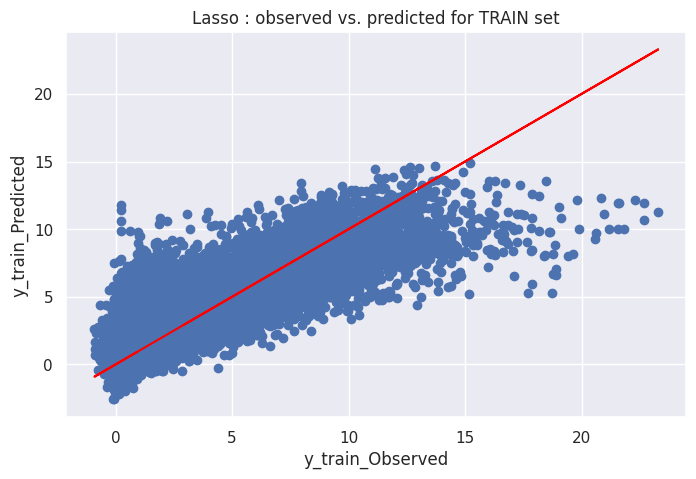

In [34]:
show_scatter_train(y_train, lasso_y_train_predicted, "Lasso")

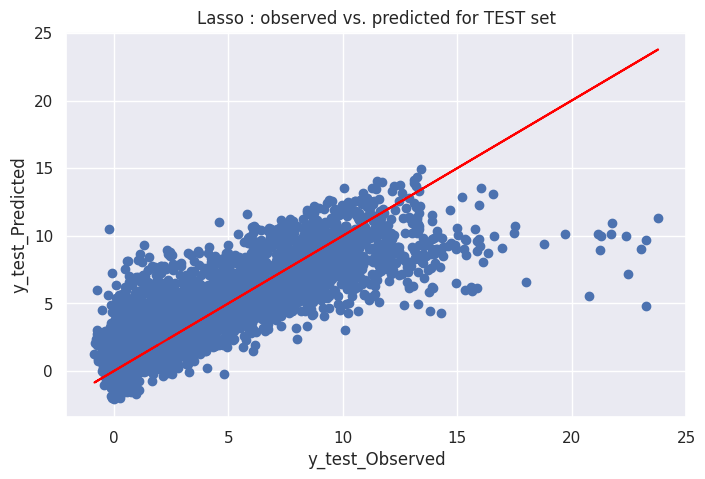

In [35]:
show_scatter_test(y_test, lasso_y_test_predicted, "Lasso")

Residual Plot for Test Data

In [36]:
sns.residplot(y_train, lasso_y_train_predicted)
plt.title('Lasso Residual Plot: Training Data')

TypeError: residplot() takes from 0 to 1 positional arguments but 2 were given

In [37]:
sns.residplot(y_test, lasso_y_test_predicted)
plt.title('Lasso Residual Plot: Test Data')

TypeError: residplot() takes from 0 to 1 positional arguments but 2 were given

Both the training and test residual plots are very similar and show a pattern, but it's not extremely obvious. With an R^2 score of 0.7172704219756341, the lasso model is an OK fit for the data.

### SVM

In [38]:
# defining parameter range
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
svm = SVR()
svm_random = RandomizedSearchCV(estimator = svm, param_distributions = svm_param_grid, 
                                scoring='neg_mean_squared_error', n_iter = 10, cv = kf, verbose=2, 
                                random_state=2022, n_jobs = -1)
# Fit the random search model
svm_random.fit(X_train, y_train)
# Print best parameters after tuning
print('SVM Best Parameters: ', svm_random.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVM Best Parameters:  {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  13.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  13.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  13.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  13.5s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  10.4s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=  10.4s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  10.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  10.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  10.3s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=  10.6s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; tota

### Evaluation of SVM

In [ ]:
# Model with Cross Validated Hyperparameters
svm_model = SVR(kernel = 'rbf', gamma = 0.1, C = 10)
svm_model.fit(X_train, y_train)

In [ ]:
# Cross Validation Results

rmse = cross_val_score(svm_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv = kf)
r2 = cross_val_score(svm_model, X_train, y_train, scoring='r2', cv = kf)

#get the mean of each fold 
print("RMSE: %.3f, Standard Deviation : %.3f" % (rmse.mean() * -1, rmse.std())) 
print("R2: %.3f, Standard Deviation : %.3f" % (r2.mean(), r2.std())) 

RMSE: 1.701, Standard Deviation : 0.036
R2: 0.810, Standard Deviation : 0.009


In [ ]:
# Train/Test Results
svm_y_train_predicted = svm_model.predict(X_train)
svm_y_test_predicted = svm_model.predict(X_test)
calculate_errors(y_train, svm_y_train_predicted, y_test, svm_y_test_predicted, "SVM")

The R2 score of SVM is: 0.7948418790808225
The RMSE of predicting the TRAINING set of SVM is: 1.3210237297469607
The RMSE of predicting the TESTING set of SVM is: 1.7555824694024678
The bias of predicting the TRAINING set of SVM is: 0.028917121627708417
The bias of predicting the TESTING set of SVM is: 0.04162584937101107


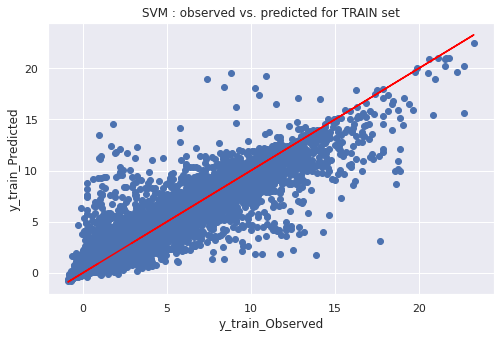

In [ ]:
show_scatter_train(y_train, svm_y_train_predicted, "SVM")

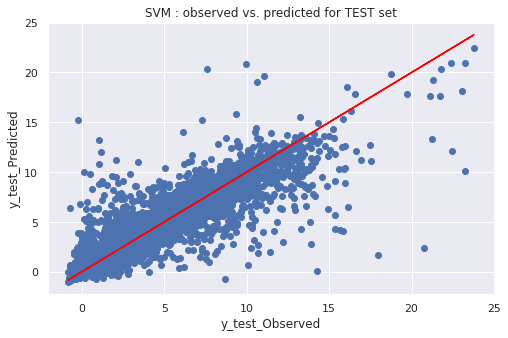

In [ ]:
show_scatter_test(y_test, svm_y_test_predicted, "SVM")

Residual Plots for SVM

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SVM Residual Plot: Training Data')

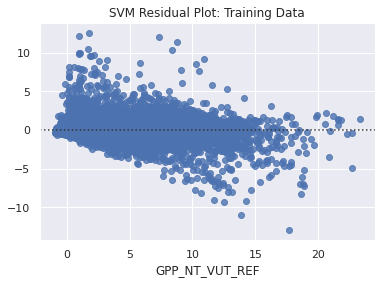

In [ ]:
sns.residplot(y_train, svm_y_train_predicted)
plt.title('SVM Residual Plot: Training Data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SVM Residual Plot: Testing Data')

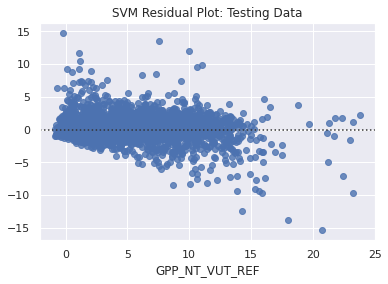

In [ ]:
sns.residplot(y_test, svm_y_test_predicted)
plt.title('SVM Residual Plot: Testing Data')

The residual plot looks better when the SVM model compared to Lasso. In both, there are a few outliers, but it seems like a pretty good fit overall.

### Random Forest

In [ ]:
# Number of trees in random forest
n_estimators = [25, 50, 75, 100, 150, 200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 0.1, 0.5, 1.0]
# Maximum number of levels in tree
max_depth = [3, 4, 5, 6]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3,4,5,6]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, search across 10 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               scoring='neg_mean_squared_error',n_iter = 10, cv = kf, verbose=2, 
                               random_state=2022, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
# Print best parameters after tuning
print('Random Forest Best Parameters: ')
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest Best Parameters: 


{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 6,
 'max_features': 0.5,
 'max_depth': 6,
 'bootstrap': True}

### Evaluation of Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200, min_samples_split=6, min_samples_leaf=6, 
                                 max_features=0.5, max_depth = 6, bootstrap = False)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=6, max_features=0.5,
                      min_samples_leaf=6, min_samples_split=6,
                      n_estimators=200)

In [ ]:
# Cross Validation Results

rmse = cross_val_score(rf_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv = kf)
r2 = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv = kf)

#get the mean of each fold 
print("RMSE: %.3f, Standard Deviation : %.3f" % (rmse.mean() * -1, rmse.std())) 
print("R2: %.3f, Standard Deviation : %.3f" % (r2.mean(), r2.std())) 

RMSE: 1.955, Standard Deviation : 0.051
R2: 0.749, Standard Deviation : 0.007


In [ ]:
# Train/Test Results

rf_y_train_predicted = rf_model.predict(X_train)
rf_y_test_predicted = rf_model.predict(X_test)
calculate_errors(y_train, rf_y_train_predicted, y_test, rf_y_test_predicted, "Random Forest")

The R2 score of Random Forest is: 0.7465317487410839
The RMSE of predicting the TRAINING set of Random Forest is: 1.81505407577418
The RMSE of predicting the TESTING set of Random Forest is: 1.9513656842940659
The bias of predicting the TRAINING set of Random Forest is: -2.0532088747728473e-17
The bias of predicting the TESTING set of Random Forest is: -0.0031401992904670057


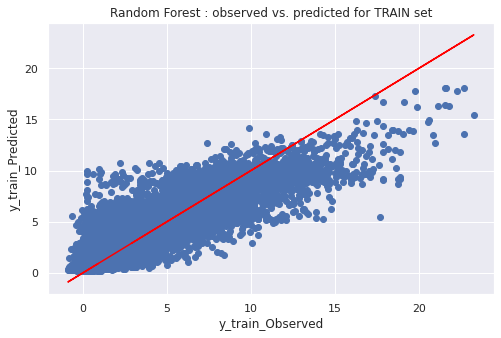

In [ ]:
show_scatter_train(y_train, rf_y_train_predicted, "Random Forest")

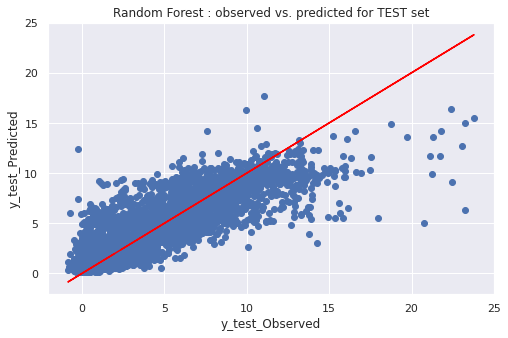

In [ ]:
show_scatter_test(y_test, rf_y_test_predicted, "Random Forest")

Residual Plots for the Random Forest Training Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Random Forest Residual Plot: Training Data')

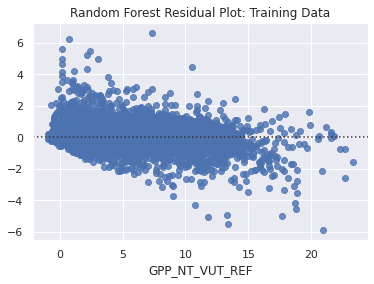

In [ ]:
sns.residplot(y_train, rf_y_train_predicted)
plt.title('Random Forest Residual Plot: Training Data');

In [ ]:
sns.residplot(y_test, rf_y_train_predicted)
plt.title('Random Forest Residual Plot: Test Data')

ValueError: ignored

### XGBoost

In [ ]:
xgb_param_grid = { 'max_depth': [3, 5, 6, 10], 
                  'min_child_weight': [1, 3, 5, 7],
                  'learning_rate': [0.01, 0.1, 0.2, 0.3],
                  'subsample': np.arange(0.5, 1.0, 0.1),
                  'colsample_bytree': np.arange(0.4, 1.0, 0.1),
                  'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
                  'n_estimators': [50, 100, 150, 200, 250]}

xgbr = XGBRegressor()
xgb_random = RandomizedSearchCV(estimator=xgbr, param_distributions=xgb_param_grid, 
                                scoring='neg_mean_squared_error', n_iter=10, cv = kf, verbose=2, 
                                random_state=2022, n_jobs = -1)
xgb_random.fit(X_train, y_train)
print("XGBoost Best Parameters: ")
xgb_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[23:28:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Best Parameters: 


{'subsample': 0.7999999999999999,
 'n_estimators': 150,
 'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.7}

### Evaluation of XGBoost

In [ ]:
xgb_model = XGBRegressor(subsample = 0.8, n_estimators = 150, max_depth = 6, 
                         learning_rate = 0.1, colsample_bytree = 0.9, colsample_bylevel = 0.7,
                         objective = 'reg:squarederror')
xgb_model.fit(X_train, y_train)

XGBRegressor(colsample_bylevel=0.7, colsample_bytree=0.9, max_depth=6,
             n_estimators=150, objective='reg:squarederror', subsample=0.8)

In [ ]:
# Cross Validation Results

rmse = cross_val_score(xgb_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv = kf)
r2 = cross_val_score(xgb_model, X_train, y_train, scoring='r2', cv = kf)

#get the mean of each fold 
print("RMSE: %.3f, Standard Deviation : %.3f" % (rmse.mean() * -1, rmse.std())) 
print("R2: %.3f, Standard Deviation : %.3f" % (r2.mean(), r2.std())) 

RMSE: 1.809, Standard Deviation : 0.039
R2: 0.785, Standard Deviation : 0.009


In [ ]:
#Train/Test Results

xgb_y_train_predicted = xgb_model.predict(X_train)
xgb_y_test_predicted = xgb_model.predict(X_test)
calculate_errors(y_train, xgb_y_train_predicted, y_test, xgb_y_test_predicted, "XGBoost")

The R2 score of XGBoost is: 0.7796584110916321
The RMSE of predicting the TRAINING set of XGBoost is: 1.0912924350901656
The RMSE of predicting the TESTING set of XGBoost is: 1.8193871272116882
The bias of predicting the TRAINING set of XGBoost is: -0.0027937810660117668
The bias of predicting the TESTING set of XGBoost is: 0.022649010151427708


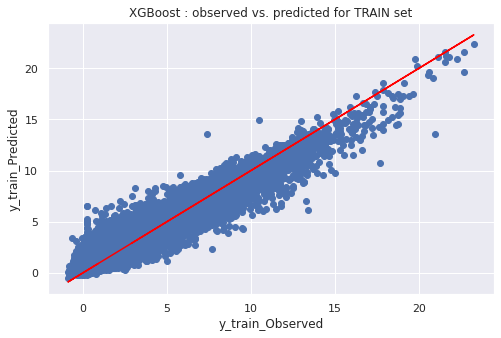

In [ ]:
show_scatter_train(y_train, xgb_y_train_predicted, "XGBoost")

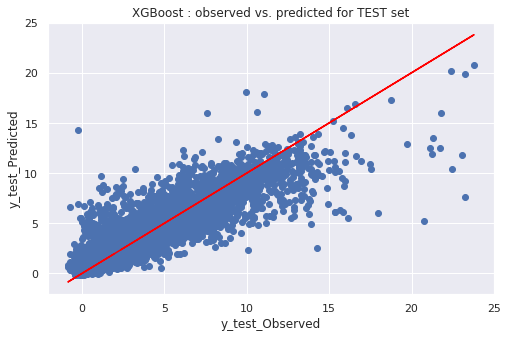

In [ ]:
show_scatter_test(y_test, xgb_y_test_predicted, "XGBoost")

Residual Plots for XGBoost

In [ ]:
sns.residplot(y_train, xgb_y_train_predicted)
plt.title('XGBoost Residual Plot: Training Data')              

In [ ]:
sns.residplot(y_test, xgb_y_test_predicted)
plt.title('XGBoost Residual Plot: Test Data')              

## Multi-Layer Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
mlp_X_train, mlp_X_test, mlp_y_train, mlp_y_test, mlp_scaler = get_train_test_split(df, 0.3, 2022, True)

In [ ]:
mlp_model = MLPRegressor(learning_rate_init=0.01, batch_size=32, max_iter=200).fit(mlp_X_train, mlp_y_train)

In [ ]:
mlp_model.predict(mlp_X_test)

array([3.46147348, 1.6097991 , 1.44052658, ..., 1.85523959, 9.40196642,
       3.53664815])

In [ ]:
mlp_model.score(mlp_X_test, mlp_y_test)

0.6610244414491495

### Evaluation of MLP Model

In [ ]:
# Cross Validation Results

rmse = cross_val_score(mlp_model, mlp_X_train, mlp_y_train, scoring='neg_root_mean_squared_error')
r2 = cross_val_score(mlp_model, mlp_X_train, mlp_y_train, scoring='r2')

#get the mean of each fold 
print("RMSE: %.3f, Standard Deviation : %.3f" % (rmse.mean() * -1, rmse.std())) 
print("R2: %.3f, Standard Deviation : %.3f" % (r2.mean(), r2.std())) 

RMSE: 2.106, Standard Deviation : 0.166
R2: 0.720, Standard Deviation : 0.025


In [ ]:
# Train/Test Results

mlp_y_train_predicted = mlp_model.predict(mlp_X_train)
mlp_y_test_predicted = mlp_model.predict(mlp_X_test)
calculate_errors(mlp_y_train, mlp_y_train_predicted, mlp_y_test, mlp_y_test_predicted, "MLP")

The R2 score of MLP is: 0.7050069799983378
The RMSE of predicting the TRAINING set of MLP is: 2.086567669584828
The RMSE of predicting the TESTING set of MLP is: 2.105148559199982
The bias of predicting the TRAINING set of MLP is: 0.48967950422881934
The bias of predicting the TESTING set of MLP is: 0.4822428991436537


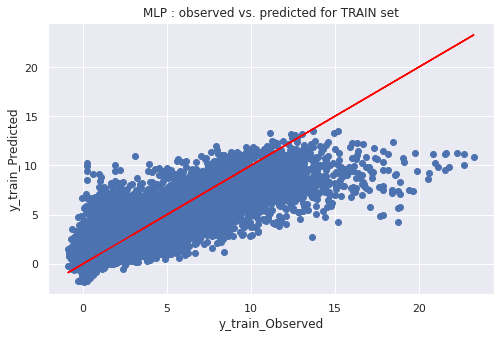

In [ ]:
show_scatter_train(mlp_y_train, mlp_y_train_predicted, "MLP")

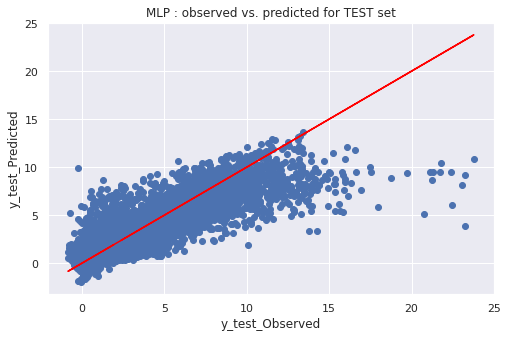

In [ ]:
show_scatter_test(mlp_y_test, mlp_y_test_predicted, "MLP")

Residual Plots for Multi-Layered Neural Network

Text(0.5, 1.0, 'MLP Residual Plot: Training Data')

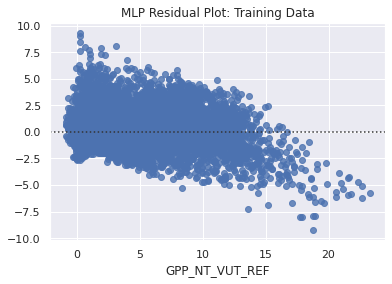

In [ ]:
sns.residplot(mlp_y_train, mlp_y_train_predicted)
plt.title('MLP Residual Plot: Training Data')

Text(0.5, 1.0, 'MLP Residual Plot: Test Data')

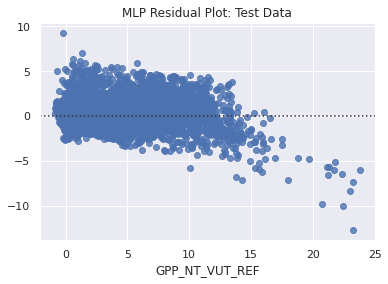

In [ ]:
sns.residplot(mlp_y_test, mlp_y_test_predicted)
plt.title('MLP Residual Plot: Test Data')

### LSTM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
print(X_train.shape)
print(y_train.shape)

NameError: ignored

In [ ]:
#x = layers.Input(shape=(1, 41))
#cell = layers.SimpleRNNCell(4, activation='tanh')
#rnn = layers.RNN(cell)
#rnn_output = rnn(x)

In [ ]:
#output = layers.Dense(units=1, activation='sigmoid')(rnn_output)
#model = keras.Model(inputs=x, outputs=output)
model = Sequential()
model.add(LSTM(4, input_shape=(41, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
10728/10728 - 61s - loss: 7.5552 - 61s/epoch - 6ms/step
Epoch 2/100
10728/10728 - 61s - loss: 5.2664 - 61s/epoch - 6ms/step
Epoch 3/100
10728/10728 - 59s - loss: 5.1365 - 59s/epoch - 6ms/step
Epoch 4/100
10728/10728 - 61s - loss: 5.0007 - 61s/epoch - 6ms/step
Epoch 5/100
10728/10728 - 60s - loss: 4.9279 - 60s/epoch - 6ms/step
Epoch 6/100
10728/10728 - 59s - loss: 4.9096 - 59s/epoch - 6ms/step
Epoch 7/100
10728/10728 - 61s - loss: 4.8732 - 61s/epoch - 6ms/step
Epoch 8/100
10728/10728 - 59s - loss: 4.8522 - 59s/epoch - 6ms/step
Epoch 9/100
10728/10728 - 59s - loss: 4.8300 - 59s/epoch - 6ms/step
Epoch 10/100
10728/10728 - 61s - loss: 4.8042 - 61s/epoch - 6ms/step
Epoch 11/100
10728/10728 - 59s - loss: 4.7871 - 59s/epoch - 6ms/step
Epoch 12/100
10728/10728 - 61s - loss: 4.7694 - 61s/epoch - 6ms/step
Epoch 13/100
10728/10728 - 59s - loss: 4.7441 - 59s/epoch - 6ms/step
Epoch 14/100
10728/10728 - 59s - loss: 4.7271 - 59s/epoch - 6ms/step
Epoch 15/100
10728/10728 - 60s - loss: 4.70

In [ ]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
print(X_train.shape)
print(trainPredict.shape)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

In [ ]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM Time series

In [46]:
#modeling
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf
# if you're using google drive to store the dataset
from google.colab import drive

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
data_path = '/content/drive/MyDrive/Discovery_2022fall_photosynthesis_mapping/Data/' + \
 'train/data_monthly_v1_0.csv'
df = pd.read_csv(data_path)

In [49]:
# attributes of eddy covariance site
site_data_attrs = ['SITE_ID','dataset','LOCATION_LAT','LOCATION_LONG','SITE_IGBP','MODIS_PFT','koppen']

# target variable: GPP
target = 'GPP_NT_VUT_REF'

In [50]:
# explanatory variables
exp_vars = [
    'BESS-PAR',  
    'BESS-PARdiff', 
    'BESS-RSDN', 
    'Tmean', 
    'prcp', 
    'vpd', 
    'prcp-lag3',
    'ESACCI-sm', 
    'ET', 
    'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'EVI', 'NDVI', 'GCI', 'NDWI', 'NIRv', 'kNDVI', 
    'CSIF-SIFdaily', 
    'Fpar', 'Lai', 
    'LST_Day', 'LST_Night', 
    'MODIS_PFT', 
    'koppen', 
]

In [51]:
# keep columns needed for stratified KFold
df_ohe = df[[target, 'MODIS_IGBP', 'SITE_ID'] + exp_vars]

categorical_columns = ['MODIS_PFT', 'koppen']
for col in categorical_columns:
    col_ohe = pd.get_dummies(df[col], prefix=col)
    df_ohe = pd.concat((df_ohe, col_ohe), axis=1).drop(col, axis=1)

df_ohe.columns

Index(['GPP_NT_VUT_REF', 'MODIS_IGBP', 'SITE_ID', 'BESS-PAR', 'BESS-PARdiff',
       'BESS-RSDN', 'Tmean', 'prcp', 'vpd', 'prcp-lag3', 'ESACCI-sm', 'ET',
       'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'EVI', 'NDVI', 'GCI', 'NDWI',
       'NIRv', 'kNDVI', 'CSIF-SIFdaily', 'Fpar', 'Lai', 'LST_Day', 'LST_Night',
       'MODIS_PFT_CRO', 'MODIS_PFT_DBF', 'MODIS_PFT_EBF', 'MODIS_PFT_ENF',
       'MODIS_PFT_GRA', 'MODIS_PFT_MF', 'MODIS_PFT_Other', 'MODIS_PFT_SA',
       'MODIS_PFT_SH', 'koppen_Arid', 'koppen_Cold', 'koppen_Polar',
       'koppen_Temperate', 'koppen_Tropical'],
      dtype='object')

In [52]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    return df

In [53]:
df = clean_dataset(df_ohe)

In [54]:
# split the dataset into training and testing
Data = df[['BESS-PAR', 'BESS-PARdiff', 'SITE_ID',
       'BESS-RSDN', 'Tmean', 'prcp', 'vpd', 'prcp-lag3', 'ESACCI-sm', 'ET',
       'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'EVI', 'NDVI', 'GCI', 'NDWI',
       'NIRv', 'kNDVI', 'CSIF-SIFdaily', 'Fpar', 'Lai', 'LST_Day', 'LST_Night',
       'MODIS_PFT_CRO', 'MODIS_PFT_DBF', 'MODIS_PFT_EBF', 'MODIS_PFT_ENF',
       'MODIS_PFT_GRA', 'MODIS_PFT_MF', 'MODIS_PFT_Other', 'MODIS_PFT_SA',
       'MODIS_PFT_SH', 'koppen_Arid', 'koppen_Cold', 'koppen_Polar',
       'koppen_Temperate', 'koppen_Tropical', target]]

In [55]:
import binascii
def test_set_check(identifier, test_ratio):
    return binascii.crc32(np.int64(hash(identifier))) & 0xffffffff < test_ratio * 2**32

# Function to split train/test
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    print(ids)
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [56]:
test, train = split_train_test_by_id(Data, 0.7, "SITE_ID")
print(train.shape, test.shape)

0        AR-SLu
1        AR-SLu
2        AR-SLu
3        AR-SLu
4        AR-SLu
          ...  
19008    SE-Lnn
19009    SE-Lnn
19010    SE-Lnn
19011    SE-Lnn
19012    SE-Lnn
Name: SITE_ID, Length: 15327, dtype: object
(11325, 43) (4002, 43)


In [57]:
train = train[['BESS-PAR', 'BESS-PARdiff',
       'BESS-RSDN', 'Tmean', 'prcp', 'vpd', 'prcp-lag3', 'ESACCI-sm', 'ET',
       'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'EVI', 'NDVI', 'GCI', 'NDWI',
       'NIRv', 'kNDVI', 'CSIF-SIFdaily', 'Fpar', 'Lai', 'LST_Day', 'LST_Night',
       'MODIS_PFT_CRO', 'MODIS_PFT_DBF', 'MODIS_PFT_EBF', 'MODIS_PFT_ENF',
       'MODIS_PFT_GRA', 'MODIS_PFT_MF', 'MODIS_PFT_Other', 'MODIS_PFT_SA',
       'MODIS_PFT_SH', 'koppen_Arid', 'koppen_Cold', 'koppen_Polar',
       'koppen_Temperate', 'koppen_Tropical', target]]

test = test[['BESS-PAR', 'BESS-PARdiff',
       'BESS-RSDN', 'Tmean', 'prcp', 'vpd', 'prcp-lag3', 'ESACCI-sm', 'ET',
       'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'EVI', 'NDVI', 'GCI', 'NDWI',
       'NIRv', 'kNDVI', 'CSIF-SIFdaily', 'Fpar', 'Lai', 'LST_Day', 'LST_Night',
       'MODIS_PFT_CRO', 'MODIS_PFT_DBF', 'MODIS_PFT_EBF', 'MODIS_PFT_ENF',
       'MODIS_PFT_GRA', 'MODIS_PFT_MF', 'MODIS_PFT_Other', 'MODIS_PFT_SA',
       'MODIS_PFT_SH', 'koppen_Arid', 'koppen_Cold', 'koppen_Polar',
       'koppen_Temperate', 'koppen_Tropical', target]]
data = Data[['BESS-PAR', 'BESS-PARdiff',
       'BESS-RSDN', 'Tmean', 'prcp', 'vpd', 'prcp-lag3', 'ESACCI-sm', 'ET',
       'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'EVI', 'NDVI', 'GCI', 'NDWI',
       'NIRv', 'kNDVI', 'CSIF-SIFdaily', 'Fpar', 'Lai', 'LST_Day', 'LST_Night',
       'MODIS_PFT_CRO', 'MODIS_PFT_DBF', 'MODIS_PFT_EBF', 'MODIS_PFT_ENF',
       'MODIS_PFT_GRA', 'MODIS_PFT_MF', 'MODIS_PFT_Other', 'MODIS_PFT_SA',
       'MODIS_PFT_SH', 'koppen_Arid', 'koppen_Cold', 'koppen_Polar',
       'koppen_Temperate', 'koppen_Tropical', target]]

In [58]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = np.vstack((train, test))
data_scaled = scaler.fit_transform(data)
train_scaled = data_scaled[:11116,]
test_scaled = data_scaled[11116:,]

In [59]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
 X, y = list(), list()
 for i in range(len(sequences)):
  # find the end of this pattern
  end_ix = i + n_steps_in
  out_end_ix = end_ix + n_steps_out-1
  # check if we are beyond the dataset
  if out_end_ix > len(sequences):
   break
  # gather input and output parts of the pattern
  seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
  X.append(seq_x)
  y.append(seq_y)
 return array(X), array(y)



# choose a number of time steps #change this accordingly
n_steps_in, n_steps_out = 12 , 12
# covert into input/output
train_X, train_y = split_sequences(train_scaled, n_steps_in, n_steps_out)
test_X, test_y = split_sequences(test_scaled, n_steps_in, n_steps_out)

print ("train_X.shape" , train_X.shape) 
print ("train_y.shape" , train_y.shape)
print ("test_X.shape" , test_X.shape) 
print ("test_y.shape" , test_y.shape)

train_X.shape (11094, 12, 41)
train_y.shape (11094, 12)
test_X.shape (4189, 12, 41)
test_y.shape (4189, 12)


In [60]:
#optimizer learning rate
opt = keras.optimizers.Adam(learning_rate=0.0001)
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, 41)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
model.add(Activation('linear'))
model.compile(loss='mse' , optimizer=opt , metrics=['mse'])


In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 50)            18400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 12)                612       
                                                                 
 activation_1 (Activation)   (None, 12)                0         
                                                                 
Total params: 39,212
Trainable params: 39,212
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = model.fit(train_X, train_y, epochs=100, batch_size=1, verbose=2)
history

Epoch 1/100
11094/11094 - 78s - loss: 0.0209 - mse: 0.0209 - 78s/epoch - 7ms/step
Epoch 2/100
11094/11094 - 70s - loss: 0.0169 - mse: 0.0169 - 70s/epoch - 6ms/step
Epoch 3/100
11094/11094 - 70s - loss: 0.0160 - mse: 0.0160 - 70s/epoch - 6ms/step
Epoch 4/100
11094/11094 - 70s - loss: 0.0154 - mse: 0.0154 - 70s/epoch - 6ms/step
Epoch 5/100
11094/11094 - 74s - loss: 0.0149 - mse: 0.0149 - 74s/epoch - 7ms/step
Epoch 6/100
11094/11094 - 69s - loss: 0.0144 - mse: 0.0144 - 69s/epoch - 6ms/step
Epoch 7/100
11094/11094 - 72s - loss: 0.0140 - mse: 0.0140 - 72s/epoch - 7ms/step
Epoch 8/100
11094/11094 - 69s - loss: 0.0138 - mse: 0.0138 - 69s/epoch - 6ms/step
Epoch 9/100
11094/11094 - 72s - loss: 0.0135 - mse: 0.0135 - 72s/epoch - 7ms/step
Epoch 10/100
11094/11094 - 69s - loss: 0.0133 - mse: 0.0133 - 69s/epoch - 6ms/step
Epoch 11/100
11094/11094 - 69s - loss: 0.0131 - mse: 0.0131 - 69s/epoch - 6ms/step
Epoch 12/100
11094/11094 - 70s - loss: 0.0130 - mse: 0.0130 - 70s/epoch - 6ms/step
Epoch 13/100


In [63]:
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

131/131 [==============================] - 1s 5ms/step


In [64]:
trainScore = np.sqrt(mean_squared_error(train_y, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(test_y, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.08 RMSE
Test Score: 0.14 RMSE


In [68]:
print(history.history.keys())  


dict_keys(['loss', 'mse'])


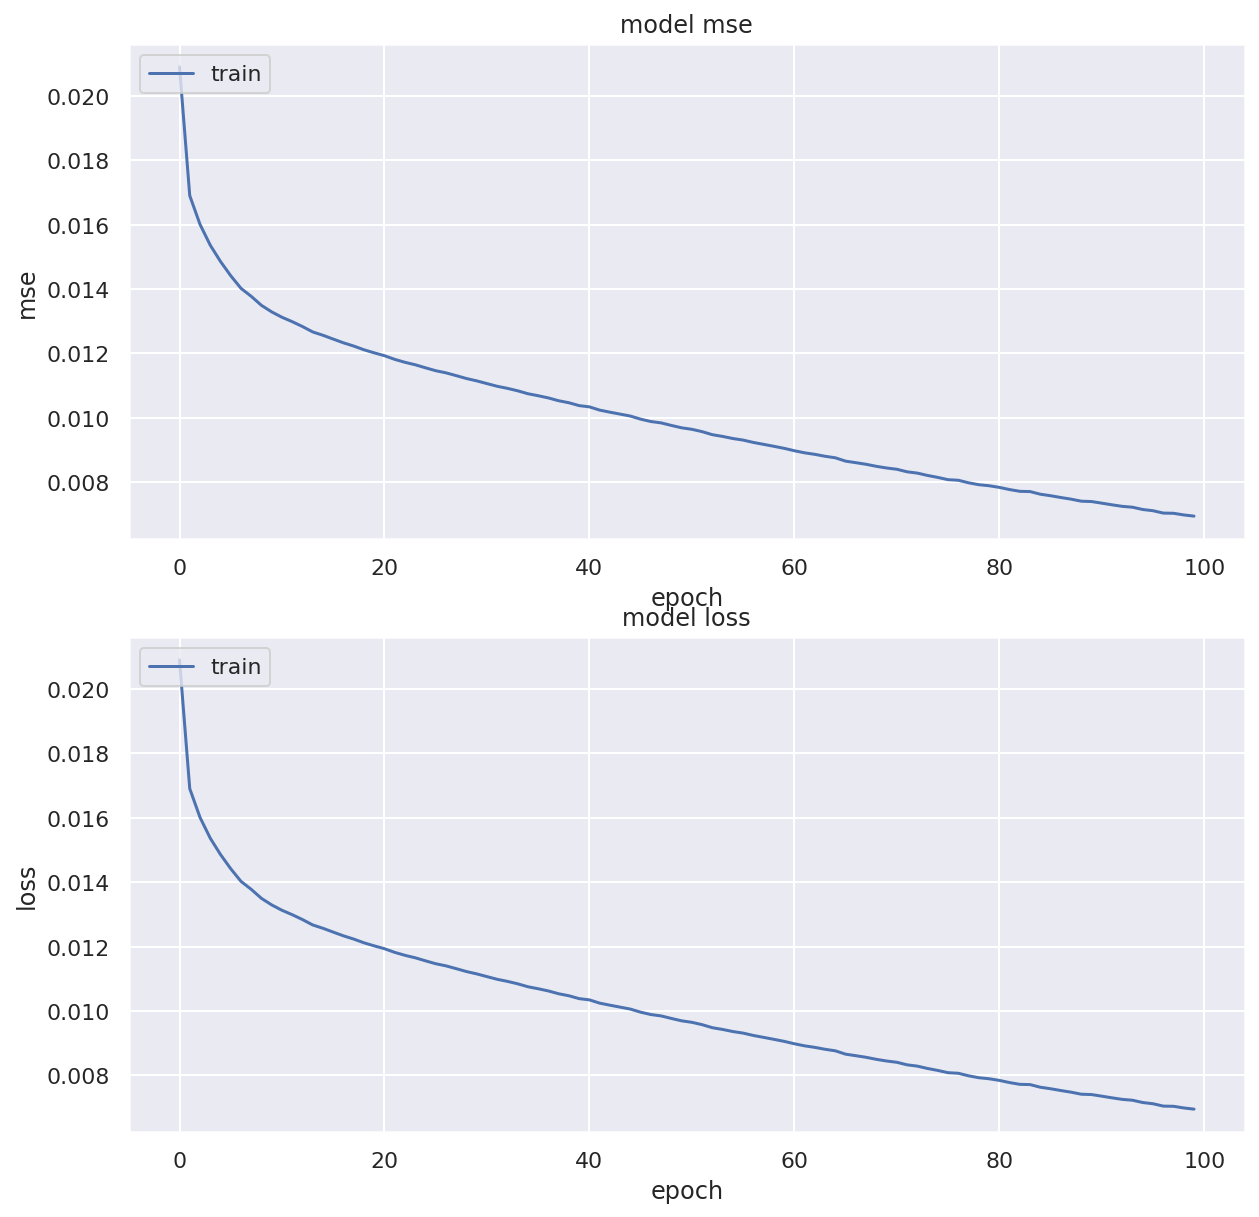

In [85]:
# Model Training History

plt.figure(figsize=(10,10))


# history for mse  
   
plt.subplot(211)  
plt.plot(history.history['mse'])  
plt.title('model mse')  
plt.ylabel('mse')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()   

In [91]:
history = model.fit(train_X, train_y, epochs=100, batch_size=1, verbose=2, validation_data=(test_X, test_y))
history

Epoch 1/100
11094/11094 - 83s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0207 - val_mse: 0.0207 - 83s/epoch - 7ms/step
Epoch 2/100
11094/11094 - 82s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0210 - val_mse: 0.0210 - 82s/epoch - 7ms/step
Epoch 3/100
11094/11094 - 81s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0209 - val_mse: 0.0209 - 81s/epoch - 7ms/step
Epoch 4/100
11094/11094 - 79s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0227 - val_mse: 0.0227 - 79s/epoch - 7ms/step
Epoch 5/100
11094/11094 - 84s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0217 - val_mse: 0.0217 - 84s/epoch - 8ms/step
Epoch 6/100
11094/11094 - 81s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0208 - val_mse: 0.0208 - 81s/epoch - 7ms/step
Epoch 7/100
11094/11094 - 79s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0216 - val_mse: 0.0216 - 79s/epoch - 7ms/step
Epoch 8/100
11094/11094 - 80s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0217 - val_mse: 0.0217 - 80s/epoch - 7ms/step
Epoch 9/100
11094/11094 - 84s - loss: 0.0059 - m

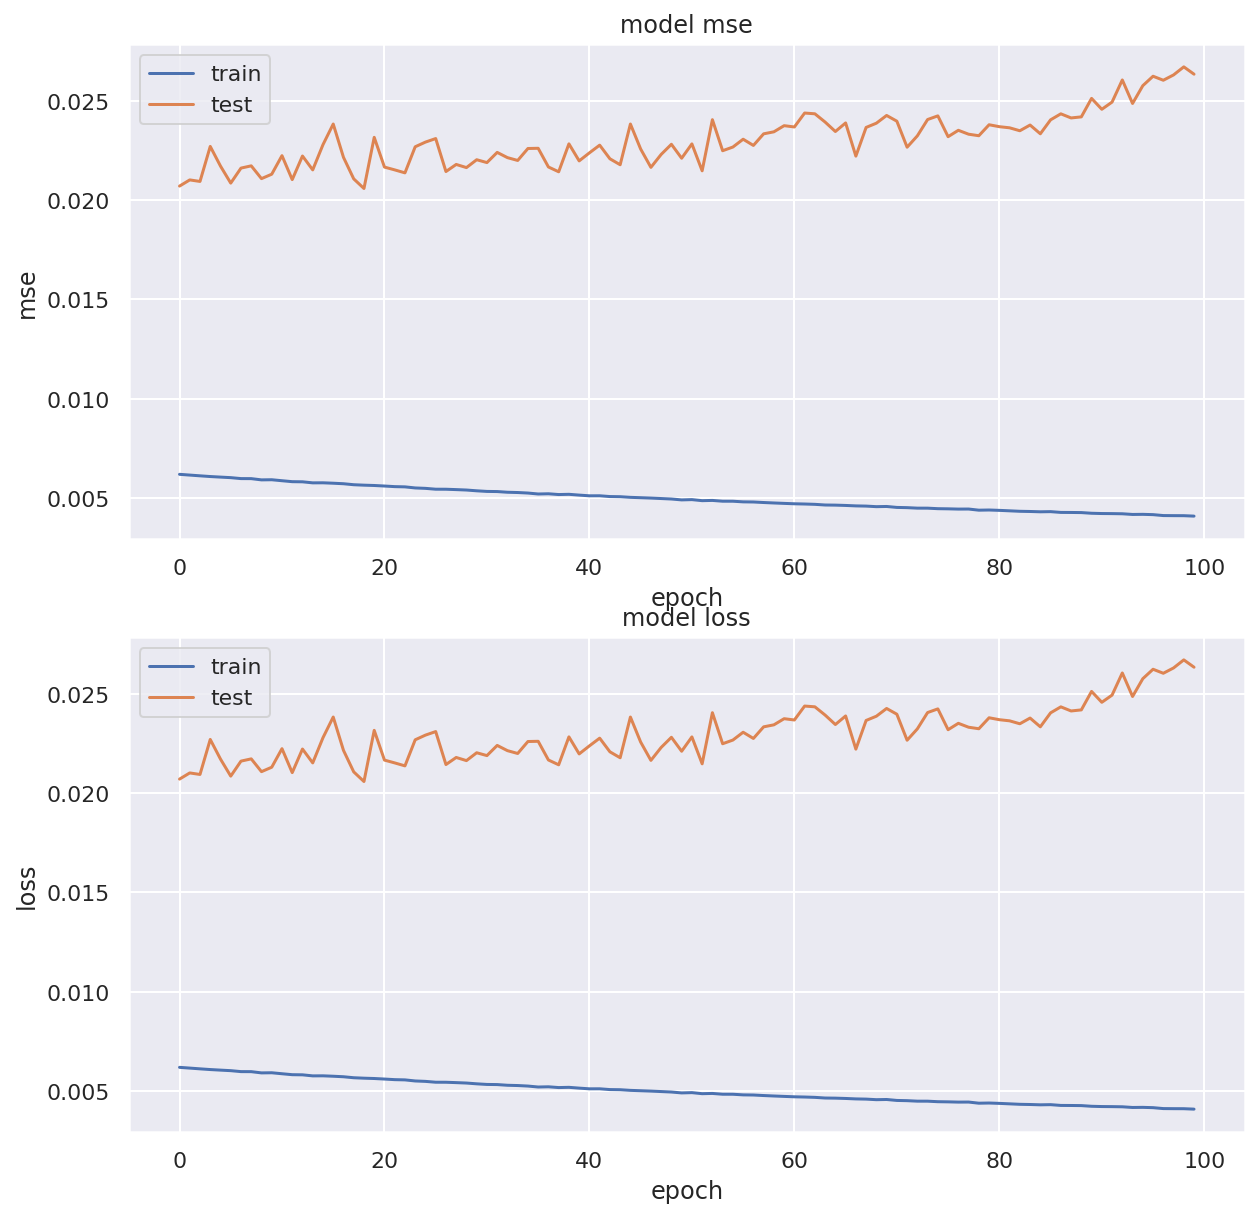

In [92]:
# Model Training History

plt.figure(figsize=(10,10))


# history for mse  
   
plt.subplot(211)  
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])    
plt.title('model mse')  
plt.ylabel('mse')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()   

In [86]:
#optimizer learning rate
opt = keras.optimizers.Adam(learning_rate=0.0001)
# define model
model_time = Sequential()
model_time.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, 41)))
model_time.add(LSTM(50, activation='relu'))
model_time.add(Dense(n_steps_out))
model_time.add(Activation('linear'))
model_time.compile(loss='mse' , optimizer=opt , metrics=['mse'])

In [ ]:
history = model_time.fit(train_X , train_y , epochs=60 , steps_per_epoch=12 , verbose=1, shuffle=False)

In [ ]:
trainPredict_time = model_time.predict(train_X)
testPredict_time = model_time.predict(test_X)

In [ ]:
trainScore = np.sqrt(mean_squared_error(train_y, trainPredict_time))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(test_y, testPredict_time))
print('Test Score: %.2f RMSE' % (testScore))